In [2]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\User\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv("train_cleaned.csv") #import file accordingly
train.head()

,Unnamed: 0,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,0,-0.272422,-0.421012,1.344057,-0.012199,0.076245,1.08786,0.236326,3,0,1,0,0,0,0,10,2,1
1,1,0.857936,0.146322,0.503673,-0.976688,-0.566950,-0.40927,-0.304531,4,1,2,0,1,0,0,0,3,0
2,2,0.952132,-0.173937,1.824277,-0.701673,0.076245,-0.40927,-0.304531,6,1,2,0,0,0,0,5,3,0
3,3,0.857936,-0.378592,0.983892,-0.039313,-0.566950,-0.40927,-0.304531,4,0,2,0,1,0,0,5,3,0
4,4,1.328918,1.565628,-1.177096,-0.097415,-0.245352,-0.40927,-0.304531,0,1,1,0,0,0,0,8,3,0


In [4]:
train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-6.763887e-17,1.011473e-16,-1.368592e-16,-1.627616e-17,4.802661e-16,3.634157e-16,7.197361e-16,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.156352e+00,-3.040398e+00,-1.777371e+00,-9.999282e-01,-5.669499e-01,-4.092695e-01,-3.045314e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.434043e-01,-4.193929e-01,-9.369864e-01,-6.009632e-01,-5.669499e-01,-4.092695e-01,-3.045314e-01,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-1.782255e-01,-2.956934e-01,2.345299e-02,-3.027078e-01,-2.453524e-01,-4.092695e-01,-3.045314e-01,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,6.695428e-01,2.003184e-02,6.237276e-01,2.357013e-01,7.624522e-02,-4.092695e-01,-3.045314e-01,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.096777e+00,3.262716e+01,1.824277e+00,1.804968e+01,1.937210e+01,8.181644e+00,2.944263e+01,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


## Clustering customers who retained (label = 0)

In [5]:
retained = train[train['labels']==0]
retained.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
1,0.857936,0.146322,0.503673,-0.976688,-0.566950,-0.40927,-0.304531,4,1,2,0,1,0,0,0,3,0
2,0.952132,-0.173937,1.824277,-0.701673,0.076245,-0.40927,-0.304531,6,1,2,0,0,0,0,5,3,0
3,0.857936,-0.378592,0.983892,-0.039313,-0.566950,-0.40927,-0.304531,4,0,2,0,1,0,0,5,3,0
4,1.328918,1.565628,-1.177096,-0.097415,-0.245352,-0.40927,-0.304531,0,1,1,0,0,0,0,8,3,0
6,0.292757,-0.320304,-0.816932,-0.643571,-0.566950,-0.40927,-0.304531,9,1,1,0,1,0,0,5,3,0


In [6]:
#drop label column
retained = retained.drop(columns='labels')
retained.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
1,0.857936,0.146322,0.503673,-0.976688,-0.566950,-0.40927,-0.304531,4,1,2,0,1,0,0,0,3
2,0.952132,-0.173937,1.824277,-0.701673,0.076245,-0.40927,-0.304531,6,1,2,0,0,0,0,5,3
3,0.857936,-0.378592,0.983892,-0.039313,-0.566950,-0.40927,-0.304531,4,0,2,0,1,0,0,5,3
4,1.328918,1.565628,-1.177096,-0.097415,-0.245352,-0.40927,-0.304531,0,1,1,0,0,0,0,8,3
6,0.292757,-0.320304,-0.816932,-0.643571,-0.566950,-0.40927,-0.304531,9,1,1,0,1,0,0,5,3


In [7]:
from sklearn.cluster import KMeans

In [8]:
features = retained[retained.columns]

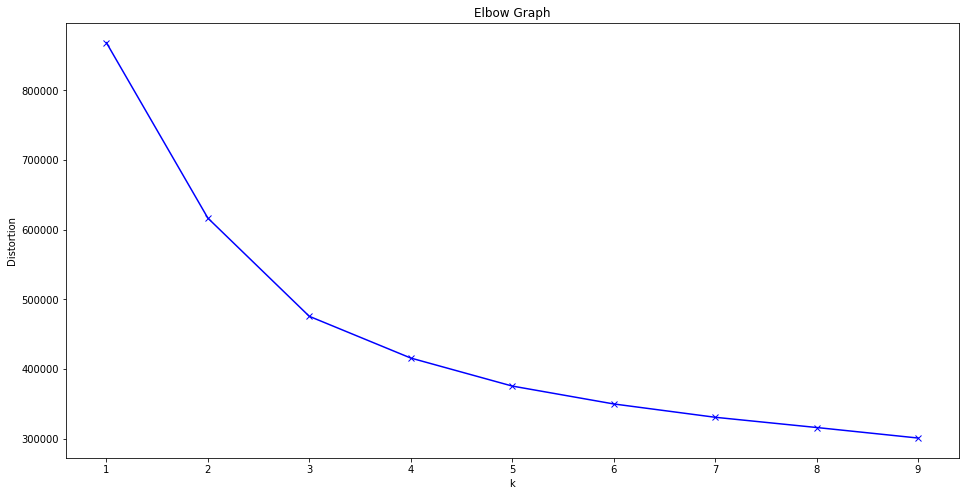

In [9]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(features)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Graph')
plt.show()

In [10]:
kmeanModel = KMeans(n_clusters=5) #change n_clusters accordingly to elbow point
kmeanModel.fit(features)

KMeans(n_clusters=5)

In [11]:
 kmeanModel.cluster_centers_

array([[ 2.92817617e-01,  1.48057881e-01,  5.74891773e-02,
        -1.30178429e-01, -2.49792751e-02, -1.00739917e-01,
        -5.16143164e-02,  4.28334407e+00,  1.10663660e+00,
         1.52094072e+00,  2.14239691e-02,  5.56539948e-01,
         1.70425258e-01,  8.12177835e-01,  7.11968428e+00,
         2.62500000e+00],
       [ 1.91410524e-01,  2.87643105e-02, -7.71662864e-02,
        -1.66830124e-01,  8.76877118e-02,  9.13931717e-02,
         5.94969916e-02,  2.61099031e+00,  1.14864598e+00,
         1.33148844e+00,  1.18600514e-02,  4.00672070e-01,
         1.30065230e-01,  7.39276537e-02,  1.38525400e+00,
         2.41490413e+00],
       [-1.94506898e-01, -6.55333317e-02,  2.87595965e-02,
        -1.46542590e-01, -1.37837595e-02, -7.50192407e-02,
        -8.18304166e-02,  8.37610900e+00,  1.20912548e+00,
         1.19914449e+00,  1.98035488e-02,  6.65240811e-01,
         1.89163498e-01,  9.35361217e-01,  7.17585551e+00,
         2.64385298e+00],
       [-1.76226019e-01, -5.69282871e

In [12]:
#store cluster label in new column
retained['cluster'] = kmeanModel.labels_ +1
retained.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,cluster
1,0.857936,0.146322,0.503673,-0.976688,-0.566950,-0.40927,-0.304531,4,1,2,0,1,0,0,0,3,2
2,0.952132,-0.173937,1.824277,-0.701673,0.076245,-0.40927,-0.304531,6,1,2,0,0,0,0,5,3,1
3,0.857936,-0.378592,0.983892,-0.039313,-0.566950,-0.40927,-0.304531,4,0,2,0,1,0,0,5,3,1
4,1.328918,1.565628,-1.177096,-0.097415,-0.245352,-0.40927,-0.304531,0,1,1,0,0,0,0,8,3,5
6,0.292757,-0.320304,-0.816932,-0.643571,-0.566950,-0.40927,-0.304531,9,1,1,0,1,0,0,5,3,3


In [13]:
#see how many customers are in each cluster
retained['cluster'].value_counts(sort = False)

1    6206
2    5061
3    6312
4    3392
5    8970
Name: cluster, dtype: int64

In [14]:
#calculating z score
#cluster mean
clus_mean = retained.groupby(['cluster'])[retained.columns].mean()
clus_mean

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,cluster
cluster,,,,,,,,,,,,,,,,,
1,0.292484,0.148067,0.057345,-0.130104,-0.024960,-0.100640,-0.051533,4.284080,1.106671,1.520464,0.021431,0.556558,0.170158,0.812440,7.119723,2.624879,1
2,0.190967,0.028663,-0.076581,-0.166997,0.087429,0.091807,0.059460,2.610156,1.148785,1.331555,0.011855,0.400711,0.130014,0.073898,1.386287,2.414543,2
3,-0.194507,-0.065533,0.028760,-0.146543,-0.013784,-0.075019,-0.081830,8.376109,1.209125,1.199144,0.019804,0.665241,0.189163,0.935361,7.175856,2.643853,3
4,-0.176226,-0.056928,0.037681,-0.164057,0.142423,-0.003664,0.010065,8.459611,1.248526,1.270047,0.014151,0.353479,0.117040,0.076651,1.604658,2.515920,4
5,-0.130172,-0.110035,0.009560,-0.128061,0.014937,-0.057073,-0.089093,0.791193,1.138016,0.900557,0.023523,0.723188,0.193645,1.005351,7.158082,2.657748,5


In [15]:
#population mean
pop_means = pd.Series(retained[retained.columns].mean())
pop_means

feature_0    -0.007064
feature_1    -0.017694
feature_2     0.012138
feature_3    -0.143040
feature_4     0.027309
feature_5    -0.038671
feature_6    -0.043433
feature_7     4.290404
feature_8     1.160850
feature_9     1.206707
feature_10    0.019271
feature_11    0.580041
feature_12    0.168398
feature_13    0.687953
feature_14    5.549113
feature_15    2.590829
cluster       3.128887
dtype: float64

In [16]:
#Calculating population std deviation
pop_std= pd.Series(retained[retained.columns].std())
pop_std

feature_0     0.959375
feature_1     0.986005
feature_2     0.997148
feature_3     0.806190
feature_4     1.037582
feature_5     0.964085
feature_6     0.934957
feature_7     3.284942
feature_8     0.600138
feature_9     0.747914
feature_10    0.137479
feature_11    0.493560
feature_12    0.374225
feature_13    0.916186
feature_14    2.945684
feature_15    0.978736
cluster       1.514345
dtype: float64

In [17]:
clus_mean.T.info() #transpose is .T

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, feature_0 to cluster
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       17 non-null     float64
 1   2       17 non-null     float64
 2   3       17 non-null     float64
 3   4       17 non-null     float64
 4   5       17 non-null     float64
dtypes: float64(5)
memory usage: 1.4+ KB


In [18]:
#Saving a copy of the transposed DF
clus_meant = clus_mean.T

In [19]:
# Change columns name to be the same as the number of clusters you have from the elbow graph
clus_meant.columns = ['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5'] 

In [20]:
clus_meant

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5
feature_0,0.292484,0.190967,-0.194507,-0.176226,-0.130172
feature_1,0.148067,0.028663,-0.065533,-0.056928,-0.110035
feature_2,0.057345,-0.076581,0.028760,0.037681,0.009560
feature_3,-0.130104,-0.166997,-0.146543,-0.164057,-0.128061
feature_4,-0.024960,0.087429,-0.013784,0.142423,0.014937
feature_5,-0.100640,0.091807,-0.075019,-0.003664,-0.057073
feature_6,-0.051533,0.059460,-0.081830,0.010065,-0.089093
feature_7,4.284080,2.610156,8.376109,8.459611,0.791193
feature_8,1.106671,1.148785,1.209125,1.248526,1.138016
feature_9,1.520464,1.331555,1.199144,1.270047,0.900557


In [21]:
#join works easily when joining on index
temp1 = clus_meant.join(pd.DataFrame(pop_means))

In [22]:
# Change columns name to be the same as the number of clusters you have from the elbow graph + pop_mean
temp1.columns = ['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5','pop_mean']  
temp1.index

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'cluster'],
      dtype='object')

In [23]:
temp1

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,pop_mean
feature_0,0.292484,0.190967,-0.194507,-0.176226,-0.130172,-0.007064
feature_1,0.148067,0.028663,-0.065533,-0.056928,-0.110035,-0.017694
feature_2,0.057345,-0.076581,0.028760,0.037681,0.009560,0.012138
feature_3,-0.130104,-0.166997,-0.146543,-0.164057,-0.128061,-0.143040
feature_4,-0.024960,0.087429,-0.013784,0.142423,0.014937,0.027309
feature_5,-0.100640,0.091807,-0.075019,-0.003664,-0.057073,-0.038671
feature_6,-0.051533,0.059460,-0.081830,0.010065,-0.089093,-0.043433
feature_7,4.284080,2.610156,8.376109,8.459611,0.791193,4.290404
feature_8,1.106671,1.148785,1.209125,1.248526,1.138016,1.160850
feature_9,1.520464,1.331555,1.199144,1.270047,0.900557,1.206707


In [24]:
temp2 = temp1.join(pd.DataFrame(pop_std))

# Change columns name to be the same as the number of clusters you have from the elbow graph + pop_mean and pop_std
temp2.columns = ['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5','pop_mean','pop_std']  
temp2

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,pop_mean,pop_std
feature_0,0.292484,0.190967,-0.194507,-0.176226,-0.130172,-0.007064,0.959375
feature_1,0.148067,0.028663,-0.065533,-0.056928,-0.110035,-0.017694,0.986005
feature_2,0.057345,-0.076581,0.028760,0.037681,0.009560,0.012138,0.997148
feature_3,-0.130104,-0.166997,-0.146543,-0.164057,-0.128061,-0.143040,0.806190
feature_4,-0.024960,0.087429,-0.013784,0.142423,0.014937,0.027309,1.037582
feature_5,-0.100640,0.091807,-0.075019,-0.003664,-0.057073,-0.038671,0.964085
feature_6,-0.051533,0.059460,-0.081830,0.010065,-0.089093,-0.043433,0.934957
feature_7,4.284080,2.610156,8.376109,8.459611,0.791193,4.290404,3.284942
feature_8,1.106671,1.148785,1.209125,1.248526,1.138016,1.160850,0.600138
feature_9,1.520464,1.331555,1.199144,1.270047,0.900557,1.206707,0.747914


In [25]:
#remove last row as it is not needed to calculate z-score
temp2 = temp2[:-1]

In [26]:
no_of_clusters = retained['cluster'].nunique()
no_of_rows = temp2.shape[0]

In [27]:
z_score = pd.DataFrame(np.random.randn(no_of_rows, no_of_clusters))

In [28]:
z_score
z_score.columns = clus_meant.columns
z_score.index = temp2.index

In [29]:
#applying formula for z_score for profiling 
v = 0
for v in range(no_of_rows):
    clus = 0
    for clus in range(no_of_clusters):
        z_score.iloc[v,clus] = (temp2.iloc[v,clus] - temp2.iloc[v,no_of_clusters])/ (temp2.iloc[v,no_of_clusters+1])
        clus = clus + 1 
    v = v + 1 

In [30]:
z_score

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5
feature_0,0.312232,0.206416,-0.195381,-0.176326,-0.128321
feature_1,0.168115,0.047015,-0.048518,-0.039791,-0.093651
feature_2,0.045337,-0.088972,0.016670,0.025617,-0.002585
feature_3,0.016046,-0.029716,-0.004344,-0.026070,0.018580
feature_4,-0.050376,0.057942,-0.039604,0.110945,-0.011924
feature_5,-0.064278,0.135338,-0.037703,0.036310,-0.019088
feature_6,-0.008664,0.110051,-0.041069,0.057220,-0.048837
feature_7,-0.001925,-0.511500,1.243768,1.269187,-1.065228
feature_8,-0.090277,-0.020103,0.080441,0.146094,-0.038048
feature_9,0.419510,0.166929,-0.010111,0.084690,-0.409337


In [31]:
z_score.round(2)

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5
feature_0,0.31,0.21,-0.20,-0.18,-0.13
feature_1,0.17,0.05,-0.05,-0.04,-0.09
feature_2,0.05,-0.09,0.02,0.03,-0.00
feature_3,0.02,-0.03,-0.00,-0.03,0.02
feature_4,-0.05,0.06,-0.04,0.11,-0.01
feature_5,-0.06,0.14,-0.04,0.04,-0.02
feature_6,-0.01,0.11,-0.04,0.06,-0.05
feature_7,-0.00,-0.51,1.24,1.27,-1.07
feature_8,-0.09,-0.02,0.08,0.15,-0.04
feature_9,0.42,0.17,-0.01,0.08,-0.41


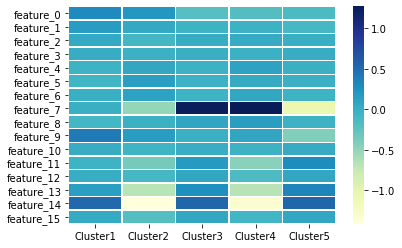

In [32]:
sns.heatmap(z_score,  linewidths=.5, cmap="YlGnBu")